<img src='11.jPG'>

In [6]:
#pip install pycaret

In [7]:
import pandas as pd

In [8]:
#Regression AutoMl

In [9]:
from pycaret.regression import*

In [10]:
df=pd.read_csv('train.csv')

In [11]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [14]:
df.isnull().sum()

ID_LAT_LON_YEAR_WEEK          0
latitude                      0
longitude                     0
year                          0
week_no                       0
                             ..
Cloud_sensor_azimuth_angle    1
Cloud_sensor_zenith_angle     1
Cloud_solar_azimuth_angle     1
Cloud_solar_zenith_angle      1
emission                      1
Length: 76, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      865 non-null    object 
 1   latitude                                                  865 non-null    float64
 2   longitude                                                 865 non-null    float64
 3   year                                                      865 non-null    int64  
 4   week_no                                                   865 non-null    int64  
 5   SulphurDioxide_SO2_column_number_density                  795 non-null    float64
 6   SulphurDioxide_SO2_column_number_density_amf              795 non-null    float64
 7   SulphurDioxide_SO2_slant_column_number_density            795 non-null    float64
 8   SulphurDioxide_cloud

In [17]:
df.isnull().sum().sort_values(ascending=False)

UvAerosolLayerHeight_aerosol_pressure         861
UvAerosolLayerHeight_aerosol_optical_depth    861
UvAerosolLayerHeight_sensor_zenith_angle      861
UvAerosolLayerHeight_sensor_azimuth_angle     861
UvAerosolLayerHeight_solar_azimuth_angle      861
                                             ... 
Ozone_solar_azimuth_angle                       0
Ozone_sensor_zenith_angle                       0
Ozone_sensor_azimuth_angle                      0
Ozone_cloud_fraction                            0
ID_LAT_LON_YEAR_WEEK                            0
Length: 76, dtype: int64

In [18]:
boslar=df.isnull().mean()
sutunkaldır=boslar[boslar>0.5].index

#Fatih Yeni den yarddım alındı
#%50 tan fazlası boş verileri kaldırdık

In [19]:
df=df.drop(sutunkaldır,axis=1)

In [20]:
df.shape

(865, 69)

In [21]:
df.isnull().sum().sort_values(ascending=False)

NitrogenDioxide_absorbing_aerosol_index    95
NitrogenDioxide_sensor_altitude            95
NitrogenDioxide_sensor_zenith_angle        95
NitrogenDioxide_solar_azimuth_angle        95
NitrogenDioxide_solar_zenith_angle         95
                                           ..
Ozone_O3_column_number_density              0
UvAerosolIndex_solar_zenith_angle           0
UvAerosolIndex_solar_azimuth_angle          0
UvAerosolIndex_sensor_zenith_angle          0
ID_LAT_LON_YEAR_WEEK                        0
Length: 69, dtype: int64

In [23]:
df.fillna(df.mean(),inplace=True)

#Boş olan değerlerin hepsini ortalama ile doldurduk

In [24]:
df.isnull().sum().sort_values(ascending=False)

ID_LAT_LON_YEAR_WEEK                    0
UvAerosolIndex_sensor_azimuth_angle     0
Ozone_O3_slant_column_number_density    0
Ozone_O3_column_number_density_amf      0
Ozone_O3_column_number_density          0
                                       ..
NitrogenDioxide_sensor_altitude         0
NitrogenDioxide_sensor_azimuth_angle    0
NitrogenDioxide_sensor_zenith_angle     0
NitrogenDioxide_solar_azimuth_angle     0
emission                                0
Length: 69, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      865 non-null    object 
 1   latitude                                                  865 non-null    float64
 2   longitude                                                 865 non-null    float64
 3   year                                                      865 non-null    int64  
 4   week_no                                                   865 non-null    int64  
 5   SulphurDioxide_SO2_column_number_density                  865 non-null    float64
 6   SulphurDioxide_SO2_column_number_density_amf              865 non-null    float64
 7   SulphurDioxide_SO2_slant_column_number_density            865 non-null    float64
 8   SulphurDioxide_cloud

In [26]:
df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,0.000056,0.835637,0.000045,0.136114,-5.207260,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,ID_-0.604_29.896_2020_12,-0.604,29.896,2020,12,0.000122,0.706342,0.000111,0.173257,16.761061,...,5920.127480,57697.893418,4966.181639,43.993737,0.233265,15.765415,32.181314,-79.966922,18.335752,56.419834
861,ID_-0.604_29.896_2020_13,-0.604,29.896,2020,13,0.000061,0.781814,0.000067,0.125615,-57.114802,...,7937.518064,46255.911545,7080.296001,9.407749,0.305579,-1.076219,42.147932,-71.903982,20.446568,61.920570
862,ID_-0.604_29.896_2020_14,-0.604,29.896,2020,14,-0.000064,0.848974,-0.000054,0.281534,-98.994995,...,6688.120798,53799.141128,5688.120798,22.144749,0.329305,-42.001962,49.342095,-67.115572,25.196656,56.684360
863,ID_-0.604_29.896_2020_15,-0.604,29.896,2020,15,-0.000466,0.666283,-0.000270,0.242988,-99.265783,...,8549.986148,42142.006973,7549.986218,17.330687,0.342424,-25.533564,34.714989,-62.166701,25.229404,57.939410


In [27]:
df=df.drop(["ID_LAT_LON_YEAR_WEEK"],axis=1)

In [28]:
setup(data=df,target='emission')

,Description,Value
0,Session id,7281
1,Target,emission
2,Target type,Regression
3,Original data shape,"(865, 68)"
4,Transformed data shape,"(865, 68)"
5,Transformed train set shape,"(605, 68)"
6,Transformed test set shape,"(260, 68)"
7,Numeric features,67
8,Preprocess,True
9,Imputation type,simple


In [29]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.4439,13.3069,3.4455,0.9940,0.0526,0.0480,0.7690
gbr,Gradient Boosting Regressor,1.7131,16.1656,3.7952,0.9927,0.2051,1.0805,0.9640
rf,Random Forest Regressor,1.6246,16.9066,3.7992,0.9925,0.0640,0.0569,1.6240
xgboost,Extreme Gradient Boosting,1.6289,17.2438,3.7914,0.9924,0.0790,0.1959,1.3640
lightgbm,Light Gradient Boosting Machine,1.8392,17.2268,3.9158,0.9923,0.1763,0.9079,0.8910
ada,AdaBoost Regressor,1.8602,17.7617,3.9863,0.9920,0.1192,0.5731,0.2670
dt,Decision Tree Regressor,2.2258,34.0493,5.5035,0.9844,0.0913,0.0725,0.0450
lr,Linear Regression,13.5821,306.9909,17.3333,0.8522,1.5340,27.5812,0.6840
ridge,Ridge Regression,14.6646,356.0305,18.6879,0.8280,1.6351,31.9906,0.0240
lasso,Lasso Regression,18.1791,523.7876,22.7736,0.7453,1.7658,37.4712,0.0480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [45]:
#DEEP LEARNİNG İLE DE DENYECEĞİZ

In [30]:
x=df.drop('emission',axis=1)
y=df[['emission']]

In [31]:
import tensorflow as tf

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [36]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
6/6 [==============================] - 2s 75ms/step - loss: 10302682112.0000 - val_loss: 2408030464.0000
Epoch 2/300
6/6 [==============================] - 0s 15ms/step - loss: 1077033088.0000 - val_loss: 135137408.0000
Epoch 3/300
6/6 [==============================] - 0s 18ms/step - loss: 80689152.0000 - val_loss: 7727926.0000
Epoch 4/300
6/6 [==============================] - 0s 16ms/step - loss: 4485696.0000 - val_loss: 11388400.0000
Epoch 5/300
6/6 [==============================] - 0s 14ms/step - loss: 10005339.0000 - val_loss: 1540479.8750
Epoch 6/300
6/6 [==============================] - 0s 11ms/step - loss: 896574.8750 - val_loss: 2092684.6250
Epoch 7/300
6/6 [==============================] - 0s 12ms/step - loss: 1196662.6250 - val_loss: 9379.0518
Epoch 8/300
6/6 [==============================] - 0s 12ms/step - loss: 379785.0625 - val_loss: 542660.3750
Epoch 9/300
6/6 [==============================] - 0s 9ms/step - loss: 213579.1250 - val_loss: 110845.9688
Epoc

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                1292      
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 19)                380       
                                                                 
 dense_5 (Dense)             (None, 1)                 20        
                                                                 
Total params: 2832 (11.06 KB)
Trainable params: 2832 (11

In [38]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

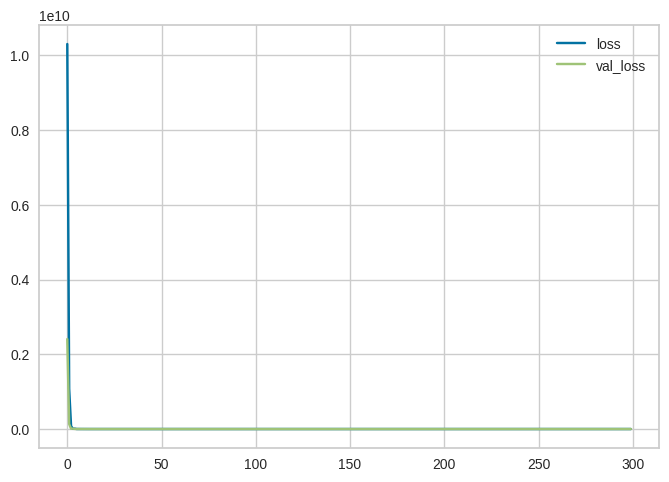

In [39]:
loss_df.plot()

In [40]:
tahmin=model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [43]:
r2_score(y_test,tahmin)

-0.19311615664115855

In [44]:
mean_squared_error(y_test,tahmin)**.5

47.91772402834795

In [1]:
#  DEEP LEARNİNG İLE  SONUÇ NEGATİF ÇIKTI BÜYÜK BİR HATA VAR

In [2]:
# AUTO ML İLE SONUÇ %99 ÇIKTI